Organic Matter Index: Measures the amount of organic matter in the soil, which is an essential component for soil fertility and structure.

pH Index: Evaluates the soil pH level, which affects nutrient availability and microbial activity in the soil.

Cation Exchange Capacity (CEC) Index: Assesses the soil's ability to retain and exchange cations, which influences nutrient availability.

Soil Texture Index: Considers the relative proportions of sand, silt, and clay particles in the soil, which affects water-holding capacity and nutrient retention.

Nutrient Index: Evaluates the soil's nutrient content, including macronutrients (nitrogen, phosphorus, potassium) and micronutrients (iron, zinc, manganese, etc.).

Water Holding Capacity Index: Measures the soil's ability to retain water, which is crucial for plant growth and drought resistance.

Soil Quality Index = (w1 * Index1 + w2 * Index2 + ... + wn * Indexn) / (w1 + w2 + ... + wn)

In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 100)

In [ ]:
# import plotly.offline as pyoff
# import chart_studio.plotly as py
# import plotly.graph_objects as go

#import chart_studio
#chart_studio.tools.set_credentials_file(username='abdeleatifi', api_key='5DuEBwbJe5DrnqoWw4l0')

In [25]:
# Define the path to your CSV file
csv_file_path = r'data_preperation/data/usda_wheat_planted_harvested_yield_soild_weatherd_priced_2014_2022.csv'

# Load the CSV file into a dataframe
df = pd.read_csv(csv_file_path)
df.head(2)

,Year,Planting_Dates,Harvesting_Dates,State,State_ANSI,Ag_District,Ag_District_Code,County,County_ANSI,Commodity,ACRES_PLANTED,ACRES_HARVESTED,YIELD_(BU/ACRE),soil_water,soil_carbon,soil_density,soil_type,gdd,ehdd,ecdd,average_price,year_open,year_high,year_low,year_close
0,2014,03-Oct,02-Jul,ARKANSAS,5,EAST CENTRAL,60,ARKANSAS,1,WHEAT,16300,15300,73.2,22.0,0.4,1530.0,Silt loam,1746.3,0.0,286.2,5.8908,5.97,7.39,4.74,5.895
1,2014,03-Oct,02-Jul,ARKANSAS,5,EAST CENTRAL,60,CRITTENDEN,35,WHEAT,40800,37000,65.7,28.0,0.4,1590.0,Clay loam,2163.6,0.0,368.9,5.8908,5.97,7.39,4.74,5.895


In [26]:
# Rename our columns
df = df.rename(columns={'Year' : 'year',
                        'Planting_Dates' : 'planting_date',
                        'Harvesting_Dates' : 'harvesting_date',
                        'State' : 'state',
                        'State_ANSI' : 'state_ansi',
                        'Ag_District' : 'ag_district',
                        'Ag_District_Code' : 'ag_district_code',
                        'County' : 'county',
                        'County_ANSI' : 'county_ansi',
                        'Commodity' : 'commodity',
                        'ACRES_PLANTED' : 'acres_planted', 
                        'ACRES_HARVESTED' : 'acres_harvested',
                        'YIELD_(BU/ACRE)' : 'yield'
                        })

In [27]:
df['production'] = (df['yield'] * 27.216) / 0.404686 # in Kg / Hectare

# Calculate a new column 'Loss_perc' based on columns 'Acres_Planted' and 'Acres_Harvested'
df['loss_perc'] = ((df['acres_planted'] - df['acres_harvested']) / df['acres_planted']).apply(lambda x: round(x, 2))

df['crop_health'] = 1 - df['loss_perc'] # in %

df['land_use'] = (df['acres_planted'] / 2.471).apply(lambda x: round(x, 2))  # in Hectares

df['harvesting_long_date'] = pd.to_datetime(df['harvesting_date'] + '-' + df['year'].astype(str), format='%d-%b-%Y')
df['planting_long_date'] = pd.to_datetime(df['planting_date'] + '-' + str(df['year'][0] - 1), format='%d-%b-%Y')

df.head(3)

,year,planting_date,harvesting_date,state,state_ansi,ag_district,ag_district_code,county,county_ansi,commodity,acres_planted,acres_harvested,yield,soil_water,soil_carbon,soil_density,soil_type,gdd,ehdd,ecdd,average_price,year_open,year_high,year_low,year_close,production,loss_perc,crop_health,land_use,harvesting_long_date,planting_long_date
0,2014,03-Oct,02-Jul,ARKANSAS,5,EAST CENTRAL,60,ARKANSAS,1,WHEAT,16300,15300,73.2,22.0,0.4,1530.0,Silt loam,1746.3,0.0,286.2,5.8908,5.97,7.39,4.74,5.895,4922.856733,0.06,0.94,6596.52,2014-07-02,2013-10-03
1,2014,03-Oct,02-Jul,ARKANSAS,5,EAST CENTRAL,60,CRITTENDEN,35,WHEAT,40800,37000,65.7,28.0,0.4,1590.0,Clay loam,2163.6,0.0,368.9,5.8908,5.97,7.39,4.74,5.895,4418.465675,0.09,0.91,16511.53,2014-07-02,2013-10-03
2,2014,03-Oct,02-Jul,ARKANSAS,5,EAST CENTRAL,60,CROSS,37,WHEAT,16600,15400,64.8,24.0,0.4,1570.0,Silt loam,2163.6,0.0,368.9,5.8908,5.97,7.39,4.74,5.895,4357.938748,0.07,0.93,6717.93,2014-07-02,2013-10-03


In [28]:
# then let's load the csv file that contains daily (almost daily) prices from 2000 to 2023

csv_file_path = r'data_preperation/data/wheat-prices-historical-chart-data.csv'

df_price = pd.read_csv(csv_file_path)
df_price['date'] = pd.to_datetime(df_price['date'], format='%d/%m/%y')

# By merging the two DFs we will have df_merged has a column named value containing wheat the closest price to the havest date

# Sort the 'harvesting_long_date' column in ascending order
df.sort_values('harvesting_long_date', inplace=True)

# Merge the dataframes based on the closest date
df = pd.merge_asof(df, df_price, left_on='harvesting_long_date', right_on='date', direction='nearest')

# Drop unnecessary columns if needed
df.drop(['date'], axis=1, inplace=True)

df['yearly_income'] = df['production'] * df['value'] # in dollars $

df.head(2)

,year,planting_date,harvesting_date,state,state_ansi,ag_district,ag_district_code,county,county_ansi,commodity,acres_planted,acres_harvested,yield,soil_water,soil_carbon,soil_density,soil_type,gdd,ehdd,ecdd,average_price,year_open,year_high,year_low,year_close,production,loss_perc,crop_health,land_use,harvesting_long_date,planting_long_date,value,yearly_income
0,2014,12-Oct,27-Jun,GEORGIA,13,SOUTH CENTRAL,80,COLQUITT,71,WHEAT,3500,1800,41.7,18.0,0.4,1550.0,Sandy loam,2113.9,0.0,24.0,5.8908,5.97,7.39,4.74,5.895,2804.414287,0.49,0.51,1416.43,2014-06-27,2013-10-12,5.9035,16555.859741
1,2014,12-Oct,27-Jun,GEORGIA,13,SOUTH CENTRAL,80,BROOKS,27,WHEAT,5100,3300,46.4,18.0,0.4,1520.0,Sandy loam,3282.5,0.8,19.9,5.8908,5.97,7.39,4.74,5.895,3120.499350,0.35,0.65,2063.94,2014-06-27,2013-10-12,5.9035,18421.867913


In [29]:
# Clean the DataFrame

df = df[['year', 
        'harvesting_long_date', 'planting_long_date', #'planting_date', 'harvesting_date', 
        'state', 'state_ansi',
       #'ag_district', 'ag_district_code', 
        'county', 'county_ansi', #'commodity',
        'acres_planted', 'acres_harvested', #'yield', 
        'soil_water',
        'soil_carbon', 'soil_density', 'soil_type', 
        'gdd', 'ehdd', 'ecdd',
       #'average_price', 'year_open', 'year_high', 'year_low', 'year_close',
        'production', #'loss_perc',
        'crop_health', 'land_use', #'value', 
        'yearly_income'
       ]].copy()

### Dropping missing values

In [30]:
df = df.dropna().reset_index(drop=True)

print(df.shape)

(8257, 20)


# ------------------------------------------------------------------------

# Farms Clustering

## Feature engineering on our data

In [31]:
df_farm = df[['year', 'state', 'county']]

### Environment Index

In [32]:
soil_type_order = {'Sand' : 1,
             'Loamy sand' : 2,
             'Silt' : 3,
             'Sandy loam' : 4,
             'Silt loam' : 5,
             'Loam' : 6,
             'Sandy clay loam' : 7,
             'Silty clay loam' : 8,
             'Clay loam' : 9,
             'Sandy clay' : 10,
             'Silty clay' : 11,
             'Clay' : 12}

df['soil_type_index'] = [soil_type_order[df['soil_type'][i]] for i in range(df.shape[0])]

In [33]:
df_env = df[[#'year', 'planting_date', 'harvesting_date', 'state', 'state_ansi',
            #'ag_district', 'ag_district_code', 'county', 'county_ansi', 'commodity',
            #'acres_planted', 'acres_harvested', 'yield', 
            'soil_water',
            'soil_carbon', 'soil_density', #'soil_type_index',# 'soil_type', 
            'gdd', 'ehdd', 'ecdd',
            #'average_price', 'year_open', 'year_high', 'year_low', 'year_close',
            #'harvesting_long_date', 'planting_long_date', 
            #'production', #'loss_perc',
            #'crop_health', 'land_use', #'value', 
            #'yearly_income'
            ]].copy()

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_env_nor = scaler.fit_transform(df_env)

df_farm['env_index'] = sum(df_env_nor[:,i] for i in range(df_env_nor.shape[1])) / df_env_nor.shape[1]

C:\Users\abdel\AppData\Local\Temp\ipykernel_4516\2484890628.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_farm['env_index'] = sum(df_env_nor[:,i] for i in range(df_env_nor.shape[1])) / df_env_nor.shape[1]


In [34]:
df_farm[['pro_index', 'man_index', 'ass_index']] = df[['production','crop_health','land_use']].copy()

C:\Users\abdel\AppData\Local\Temp\ipykernel_4516\2313123544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_farm[['pro_index', 'man_index', 'ass_index']] = df[['production','crop_health','land_use']].copy()
C:\Users\abdel\AppData\Local\Temp\ipykernel_4516\2313123544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_farm[['pro_index', 'man_index', 'ass_index']] = df[['production','crop_health','land_use']].copy()
C:\Users\abdel\AppData\Local\Temp\ipykernel_4516\2313123544.py:1: SettingWithCopyWar

In [49]:
new_array = np.concatenate((X_scaled, kmeans.labels_.reshape(-1, 1)), axis=1)

c:\Users\abdel\anaconda3\envs\abtest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\abdel\anaconda3\envs\abtest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\abdel\anaconda3\envs\abtest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\abdel\anaconda3\envs\abtest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users

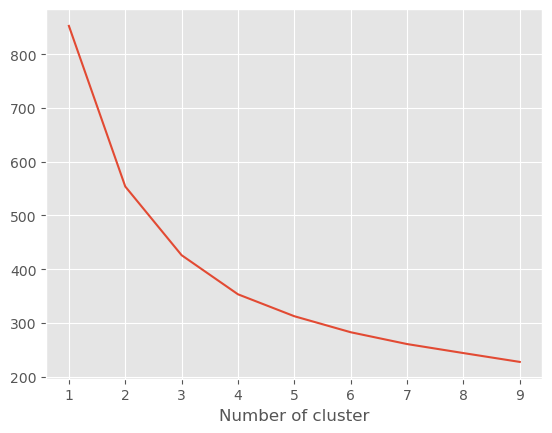

In [51]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

sclaer = StandardScaler()
X_scaled = scaler.fit_transform(df_farm[['env_index','pro_index', 'man_index', 'ass_index']])

sse={}

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_scaled)

    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [ ]:
#We scale the data to ensure that
#feature units don't impact distances
from sklearn.preprocessing import StandardScaler
sclaer = StandardScaler()
X_scaled = scaler.fit_transform(df_farm[['env_index','pro_index', 'man_index', 'ass_index']])
#This scaled data can then be fed into the HAC algorithm
from sklearn.cluster import AgglomerativeClustering
#We can tell it how many clusters we're aiming for
agg_clust = AgglomerativeClustering(n_clusters=4)
df_farm['assigned_clusters_HAC'] = agg_clust.fit_predict(X_scaled)

#This scaled data can then be fed into the K-Means alorithm
from sklearn.cluster import KMeans
#We can tell it how many clusters we're aiming for
km_clust = KMeans(n_clusters=4)
df_farm['assigned_clusters_Kmeans'] = km_clust.fit_predict(X_scaled)

In [43]:
df_farm

,year,state,county,env_index,pro_index,man_index,ass_index,assigned_clusters_HAC,assigned_clusters_Kmeans
0,2014,GEORGIA,COLQUITT,0.250471,2804.414287,0.51,1416.43,0,1
1,2014,GEORGIA,BROOKS,0.277538,3120.499350,0.65,2063.94,0,1
2,2014,GEORGIA,MADISON,0.188201,3228.102776,0.77,526.10,1,0
3,2014,GEORGIA,HART,0.203627,3961.151115,0.75,485.63,1,0
4,2014,GEORGIA,FRANKLIN,0.223565,3167.575849,0.58,485.63,1,1
...,...,...,...,...,...,...,...,...,...
8252,2022,IDAHO,CARIBOU,0.193859,3981.326757,0.92,9227.03,1,0
8253,2022,IDAHO,BONNEVILLE,0.372692,4875.780235,0.91,6070.42,2,2
8254,2022,IDAHO,BINGHAM,0.370632,7955.928300,0.91,34965.60,2,2
8255,2022,IDAHO,TWIN FALLS,0.352469,10390.455810,0.78,8862.81,2,2


In [60]:
df_farm['Class'] = 'Risky'
df_farm.loc[df_farm['OverallScore'] > 4,'Class'] = 'Average'
#df_farm.loc[df_farm['OverallScore'] > 5,'Class'] = 'Good'  
df_farm.loc[df_farm['OverallScore'] > 8,'Class'] = 'Excellent' 

In [59]:
df_farm

,year,state,county,env_index,EnvironmentCluster,man_index,ManagementCluster,inc_index,IncomeCluster,ass_index,AssetsCluster,OverallScore,Class,OverallCluster
0,2014,GEORGIA,COLQUITT,0.250471,1,0.51,1,0.001512,0,0.007927,0,2,Risky,1
1,2014,GEORGIA,BROOKS,0.277538,1,0.65,1,0.003135,0,0.011770,0,2,Risky,5
2,2014,GEORGIA,PUTNAM,0.259976,1,0.58,1,0.000950,0,0.002642,0,2,Risky,1
3,2014,MISSISSIPPI,HINDS,0.276616,1,0.58,1,0.001054,0,0.002402,0,2,Risky,1
4,2014,SOUTH CAROLINA,FLORENCE,0.248705,1,0.67,1,0.000637,0,0.002402,0,2,Risky,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8252,2020,TEXAS,HARTLEY,0.265732,1,0.97,3,0.425656,4,0.279366,2,10,Excellent,0
8253,2020,TEXAS,LAMB,0.269414,1,1.00,3,0.265721,4,0.263752,2,10,Excellent,0
8254,2018,OKLAHOMA,CRAIG,0.227386,0,0.98,3,0.380462,4,0.428297,2,9,Excellent,4
8255,2016,ILLINOIS,CHRISTIAN,0.305783,2,0.88,3,0.384587,4,0.290175,2,11,Excellent,0


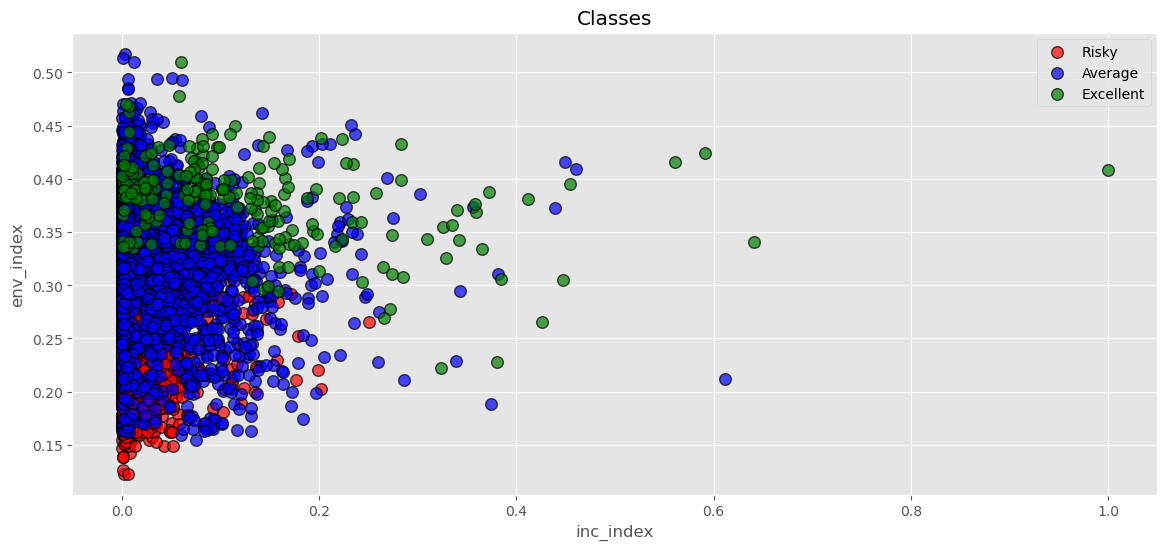

In [62]:
tx_graph = df_farm

plt.figure(figsize=(14, 6))
xaxis = 'inc_index'
yaxis = 'env_index'

sns.scatterplot(
    x=tx_graph.query("Class == 'Risky'")[xaxis],
    y=tx_graph.query("Class == 'Risky'")[yaxis],
    color='red',
    alpha=0.7,
    label='Risky',
    edgecolor='black',
    linewidth=1,
    s=70
)

sns.scatterplot(
    x=tx_graph.query("Class == 'Average'")[xaxis],
    y=tx_graph.query("Class == 'Average'")[yaxis],
    color='blue',
    alpha=0.7,
    label='Average',
    edgecolor='black',
    linewidth=1,
    s=70
)

sns.scatterplot(
    x=tx_graph.query("Class == 'Excellent'")[xaxis],
    y=tx_graph.query("Class == 'Excellent'")[yaxis],
    color='green',
    alpha=0.7,
    label='Excellent',
    edgecolor='black',
    linewidth=1,
    s=70
)

plt.xlabel(xaxis)
plt.ylabel(yaxis)
plt.title('Classes')
plt.legend()
plt.show()

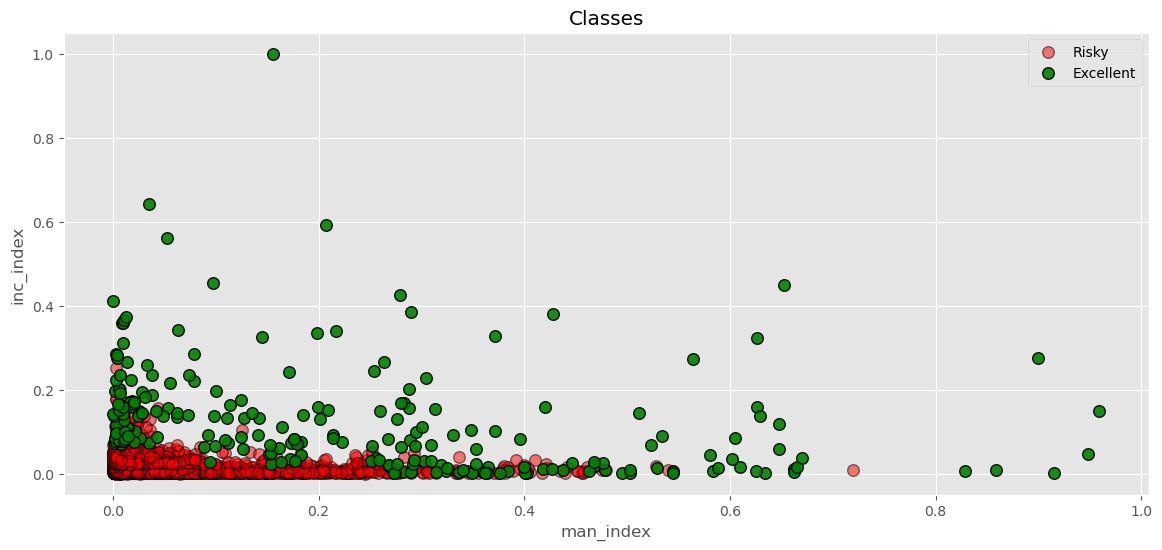

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

tx_graph = df_farm

plt.figure(figsize=(14, 6))

sns.scatterplot(
    x=tx_graph.query("Class == 'Risky'")['ass_index'],
    y=tx_graph.query("Class == 'Risky'")['inc_index'],
    color='red',
    alpha=0.5,
    label='Risky',
    edgecolor='black',
    linewidth=1,
    s=70
)

sns.scatterplot(
    x=tx_graph.query("Class == 'Excellent'")['ass_index'],
    y=tx_graph.query("Class == 'Excellent'")['inc_index'],
    color='green',
    alpha=0.9,
    label='Excellent',
    edgecolor='black',
    linewidth=1,
    s=70
)

plt.xlabel('man_index')
plt.ylabel('inc_index')
plt.title('Classes')
plt.legend()
plt.show()

c:\Users\abdel\anaconda3\envs\abtest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\abdel\AppData\Local\Temp\ipykernel_11048\1708002432.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Overall_index["clusters"] = kmeans.labels_
c:\Users\abdel\anaconda3\envs\abtest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\abdel\AppData\Local\Temp\ipykernel_11048\1708002432.py:7: SettingWithCopyWarning: 
A value is t

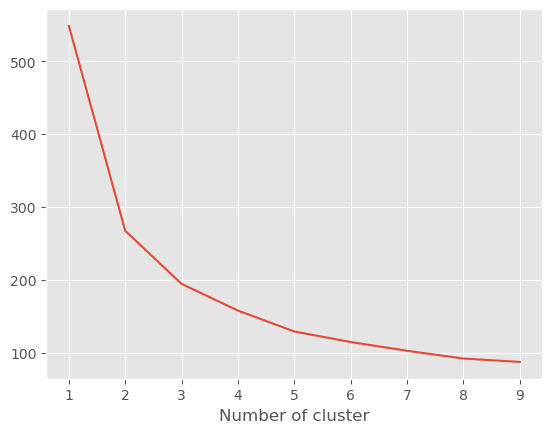

In [38]:
from sklearn.cluster import KMeans

sse={}
Overall_index = df_farm[['env_index','man_index','inc_index','ass_index']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(Overall_index)
    Overall_index["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [41]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(df_farm[['env_index','man_index','inc_index','ass_index']])
df_farm['OverallCluster'] = kmeans.predict(df_farm[['env_index','man_index','inc_index','ass_index']])

c:\Users\abdel\anaconda3\envs\abtest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


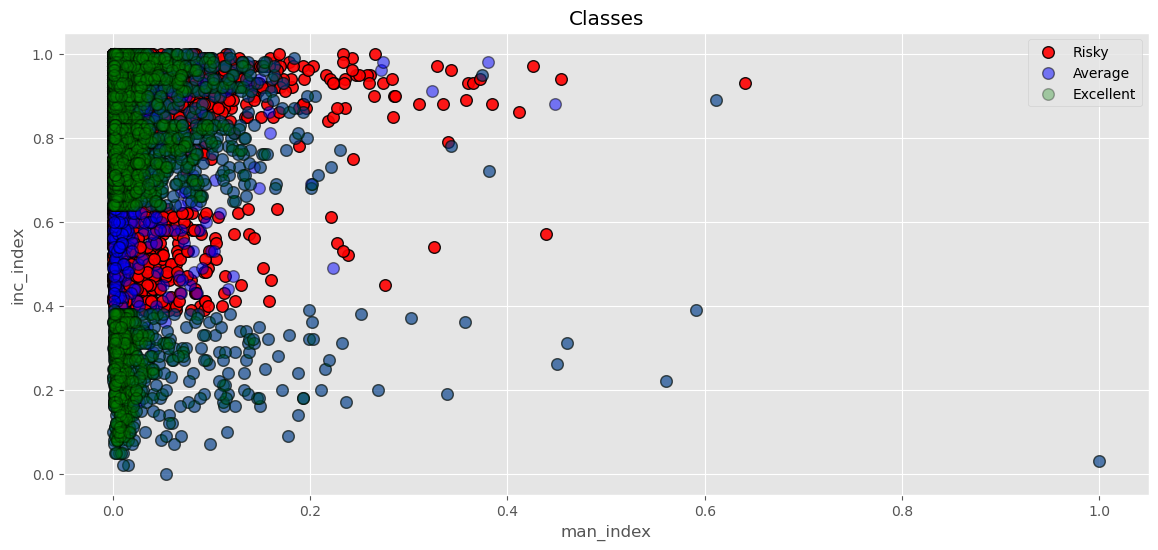

In [44]:
tx_graph = df_farm

plt.figure(figsize=(14, 6))
xaxis = 'inc_index'
yaxis = 'man_index'

sns.scatterplot(
    x=tx_graph.query("OverallCluster <= 2")[xaxis],
    y=tx_graph.query("OverallCluster <= 2")[yaxis],
    color='red',
    alpha=0.9,
    label='Risky',
    edgecolor='black',
    linewidth=1,
    s=70
)

sns.scatterplot(
    x=tx_graph.query("OverallCluster > 2")[xaxis],
    y=tx_graph.query("OverallCluster > 2")[yaxis],
    color='blue',
    alpha=0.5,
    label='Average',
    edgecolor='black',
    linewidth=1,
    s=70
)

sns.scatterplot(
    x=tx_graph.query("OverallCluster > 4")[xaxis],
    y=tx_graph.query("OverallCluster > 4")[yaxis],
    color='green',
    alpha=0.3,
    label='Excellent',
    edgecolor='black',
    linewidth=1,
    s=70
)

plt.xlabel('man_index')
plt.ylabel('inc_index')
plt.title('Classes')
plt.legend()
plt.show()